In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.misc import factorial

In [2]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

Write python code which takes as input the number of trials N (i.e., coins that arebeing flipped) and the number of successes x (out of N), and reports the observed probability:P(N,x) for a coin flip (assuming p(heads or tails) = 0.5). DO NOT USE the binomial formula.Instead, use the frequentist technique of averaging over a large set of M realizations from arandom variable. Hint: see the examples in the jupyter notebook ​StatisticsPart1​.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
0.5
[9.53674316e-07 1.90734863e-05 1.81198120e-04 1.08718872e-03
 4.62055206e-03 1.47857666e-02 3.69644165e-02 7.39288330e-02
 1.20134354e-01 1.60179138e-01 1.76197052e-01 1.60179138e-01
 1.20134354e-01 7.39288330e-02 3.69644165e-02 1.47857666e-02
 4.62055206e-03 1.08718872e-03 1.81198120e-04 1.90734863e-05
 9.53674316e-07]


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


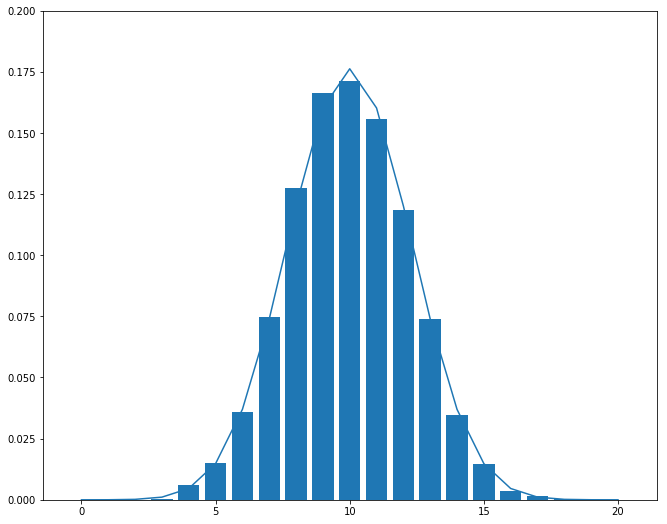

In [3]:
#Exercise 1
x = 20
counts = np.zeros(x+1)
print(counts)

for i in range(0,10000):
        draw_array = np.random.randint(2, size = x
                                      )
        heads_count = len(draw_array[(np.where(draw_array == 1))])
        tails_count = len(draw_array[(np.where(draw_array == 0))])
        counts[heads_count] = counts[heads_count] + 1
        Num_flips = float(heads_count) + float(tails_count)
        success = float(heads_count) / Num_flips
print(counts[1:].sum()/10000)
print(float(success))
plt.bar(np.arange(x + 1), counts/10000)
plt.ylim(0,0.2)

def P(N,x):
    counts = np.zeros(x+1)
    total_counts = 0
    for i in range (0, N):
        draw_array = np.random.randint(2, size = x)
        heads_count = len(draw_array[(np.where(draw_array == 1))])
        tails_count = len(draw_array[(np.where(draw_array == 0))])
        counts[heads_count] = counts[heads_count] + 1
    return(counts/N)
#theoretical prediction
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
plt.plot(np.arange(x+1), PNx(x))
print(PNx(x))



In [4]:
#expected value
#we need the probability of x (P(x)) * the value x (x) and we want to sum over all trials

def EV_analytical(N):
    EV_a = 0
    for i in range(0,N):
        EV_a = EV_a + PNx(N)[i]*i
    return EV_a

def EV_experimental(N):
    EV_a = 0
    for i in range(0,N):
        EV_a = EV_a + P(100000,N)[i]*i
    return EV_a

print('EV for N = 20 is', EV_experimental(20))
print('EV for N = 40 is', EV_experimental(40))
print('Analytical EV for N = 20 is', EV_analytical(20))
print('Analytical EV for N = 40 is', EV_analytical(40))

EV for N = 20 is 9.9534
EV for N = 40 is 19.941440000000004
Analytical EV for N = 20 is 9.999980926513672
Analytical EV for N = 40 is 19.999999999963624


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


We need **a lot** more flips of the set of 5 coins. Try 100.

## The Binomial Theorem 

Now, over plot a theory curve, which is a representation of the binomial series for p=0.5 (general binomial distribution is slightly different!):
$P(x=n) = \frac{N!}{n!(N-n)!}p^N$

What is $n$? $N$? 

$N$ is the total number of coins being flipped.
$n$ is the number of heads you observe.

0.20265038999999999
0.2028
0.04194439
0.049100000000000005


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


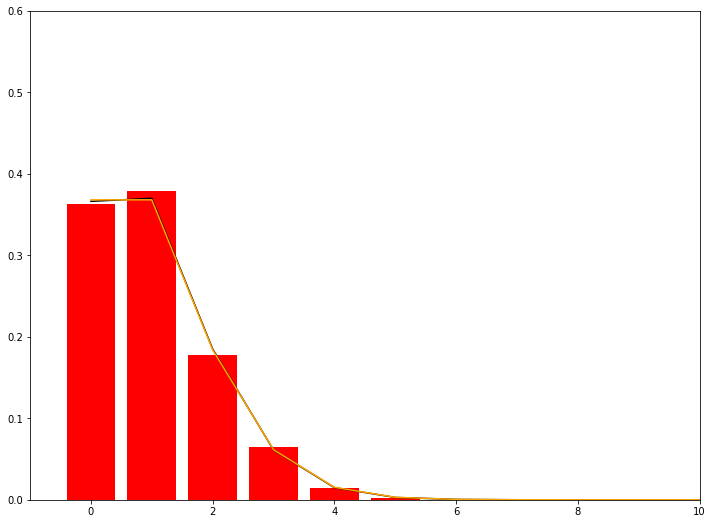

In [96]:
#Exercise 2
count_heads = 0
prob = 0.01
N = 10000
throws = 100

#theoretical function     b
def PX(N,prob):
    x = np.arange(N+1)
    PN = (factorial(N)/(factorial(x)*factorial(N-x)))*(prob**x)*(1-prob)**(N-x)
    return PN
#experimental function      b
def P(N,throws,prob):
    counts = np.zeros(throws+1)
    for i in range (0,N):
        draw_array = np.random.uniform(0,1, size = throws)
        heads_count = len(draw_array[(np.where(draw_array <= prob))])
        tails_count = len(draw_array[(np.where(draw_array >= prob))])
        counts[heads_count] = counts[heads_count] + 1   
    return(counts/N)

#poisson distribution       c
import math
def PD(N,x):
    x = np.arange(N+1)
    Lambda = N*prob
    PS = (Lambda)**x*math.exp(-Lambda)/factorial(x)
    return PS

#variance and expected value of Poisson for empirical   d
def Variance_Poisson(throws,prob):
    VP = 0
    VP2 = 0
    probs = P(N,throws,prob)
    for i in range(0,throws):
        VP += probs[i]*i**2 
        VP2 += (probs[i]*i)
    return VP-(VP2)**2

def EV_Poisson(throws,prob):
    EV_P = 0
    probs = P(N,throws,prob)
    for i in range(0,throws+1):
        EV_P = EV_P + probs[i]*i
    return EV_P

#print(EV_Poisson(10000,0.01))
print(Variance_Poisson(20,0.01))
print(EV_Poisson(20,0.01))
print(Variance_Poisson(40,0.001))
print(EV_Poisson(50,0.001))


plt.figure(figsize = (12,9))
plt.bar(np.arange(101), P(N, 100, prob), color = 'red')   #EXPERIMENT
plt.xlim(-1,10)
plt.ylim(0,0.6)
plt.plot(np.arange(101), PX(100,prob), color = 'black')   #THEORY
plt.plot(np.arange(101), PD(100,prob), color = 'orange')  #POISSON



In [102]:
prob_array = np.linspace(0,0.3,100)
variance = np.zeros(100)
mean = np.zeros(100)

for i,p in enumerate (prob_array):
    #prob_array[i] = 0.2 * i
    variance[i] = Variance_Poisson(20,p)
    mean[i] = EV_Poisson(20,p)


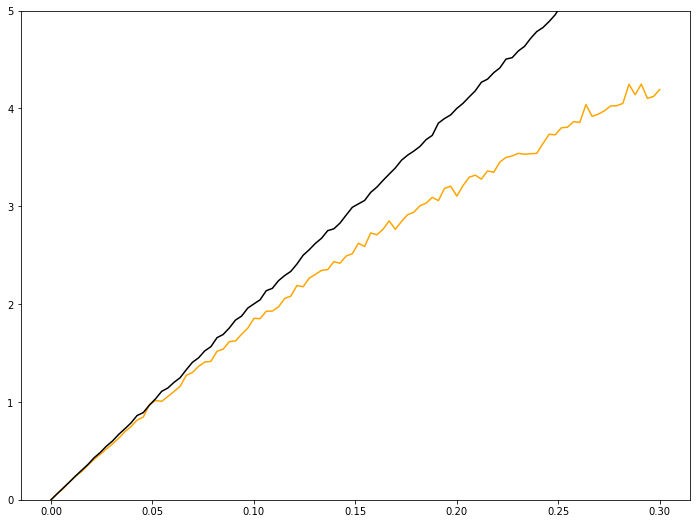

In [103]:
plt.figure(figsize = (12,9))
plt.plot(prob_array, variance, color = 'orange')
plt.ylim(0,5)
plt.plot(prob_array, mean, color = 'black')